In [ ]:
# Start writing code here...
# Start writing code here...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

In [ ]:
N = 10  # number of nodes
k = 1.5  # average connections per node: degree of network
p = 0.15  # k/N
adj_matrix = bernoulli.rvs(p, size=(N, N))  # adjacency matrix
np.fill_diagonal(adj_matrix, 0)
adj_matrix

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

<AxesSubplot:>

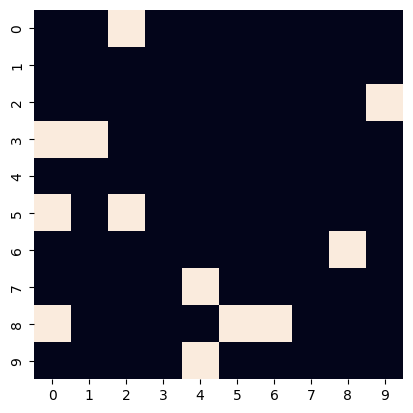

In [ ]:
sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
# adjacency list
adj_list = {node_i: np.where(row)[0] for node_i,row in enumerate(adj_matrix)}
adj_list

{0: array([2]),
 1: array([], dtype=int64),
 2: array([9]),
 3: array([0, 1]),
 4: array([], dtype=int64),
 5: array([0, 2]),
 6: array([8]),
 7: array([4]),
 8: array([0, 5, 6]),
 9: array([4])}

In [ ]:
# edge list
edge_list = [(ni, vi) for ni, row in enumerate(adj_matrix) for vi, ri in enumerate(row) if ri]
edge_list

[(0, 2),
 (2, 9),
 (3, 0),
 (3, 1),
 (5, 0),
 (5, 2),
 (6, 8),
 (7, 4),
 (8, 0),
 (8, 5),
 (8, 6),
 (9, 4)]

(-0.7483641904606583,
 1.0616297748927652,
 -0.9623715899144845,
 0.892660323551328)

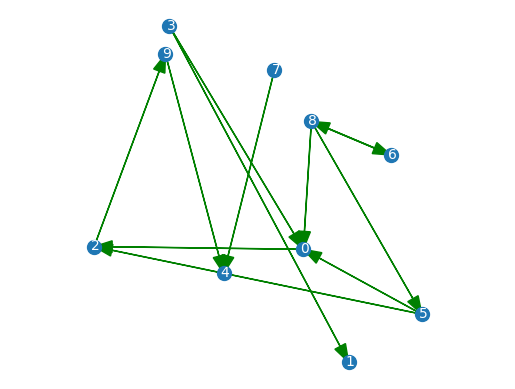

In [ ]:
def draw_arc(a, b, hw = 0.06):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )


a, b = -1, 1
x = np.random.random(N)*(b-a) + a
y = np.random.random(N)*(b-a) + a

plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b)

plt.axis('off')
plt.axis('equal')

![](http://mathinsight.org/media/image/image/polar_coordinates_cartesian.png)

(-1.100328812682313,
 1.1004394285533543,
 -1.0469421186324412,
 1.0466974808954794)

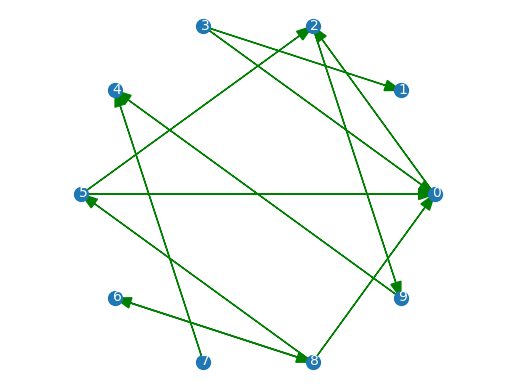

In [ ]:
angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)


plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b)

plt.axis('off')
plt.axis('equal')

(-1.1005230810839624,
 1.1005230810839624,
 -1.046712167924669,
 1.046712167924669)

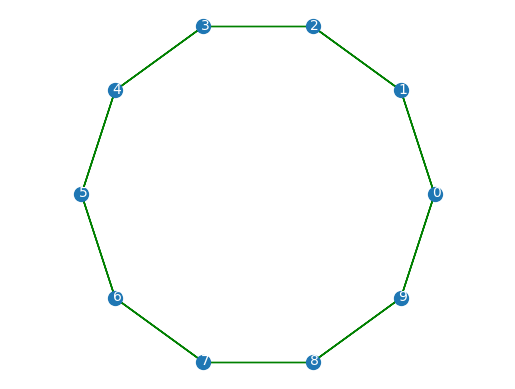

In [ ]:
C = []  # Connectivity matrix
N = 10
k = 2
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni+(ki+1), ni-(ki+1)]

C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

edge_list = [(ni, vi) for ni, vecinos in enumerate(C) for vi in vecinos]

angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)


plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b, 0)

plt.axis('off')
plt.axis('equal')

In [ ]:
C

array([[1, 9],
       [2, 0],
       [3, 1],
       [4, 2],
       [5, 3],
       [6, 4],
       [7, 5],
       [8, 6],
       [9, 7],
       [0, 8]])

In [ ]:
# Small world:
# Starts with a regular network (Ring o Grid)
# Fraction of average random shortcuts ("long distance")
# probability of rewiring, of generating a random shortcut
# omega = K_r / K
N = 10
K = 2
omega = 0.25
all_nodes = set(range(N))
ni = 0  # node to explore
all_nodes, set(C[ni]), all_nodes - set(list(C[ni])+[ni])

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {1, 9}, {2, 3, 4, 5, 6, 7, 8})

In [ ]:
available_nodes = all_nodes - set(list(C[ni])+[ni])
np.random.choice(list(available_nodes))

5

In [ ]:
R = C.copy()  # Original ring

for i in range(N):
    for j, nj in enumerate(C[i]):
        available_nodes = all_nodes - set(list(C[i])+[i])
        if np.random.random() < omega:  # rewire
            C[i, j] = np.random.choice(list(available_nodes))
C  # has been rewired

array([[1, 2],
       [2, 0],
       [3, 1],
       [4, 2],
       [5, 3],
       [6, 0],
       [7, 5],
       [8, 5],
       [9, 7],
       [0, 7]])

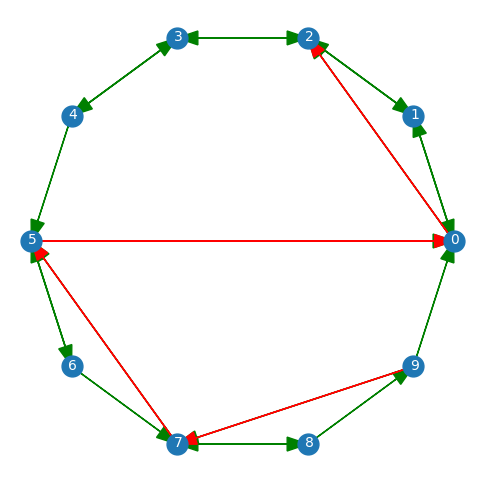

In [ ]:
def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

adj_list = {node: neighbors for node, neighbors in enumerate(C)}

rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}

plot_circular_layout(adj_list, hw=0.065, rewired_arcs=rewired_arcs)

In [ ]:
# Weight matrix
# W = [np.zeros(len(C[ni])) for ni in range(N)]
W = [np.random.randint(2, size=len(C[ni]))*2-1 for ni in range(N)]
states = np.random.randint(2, size=N)
W, states

([array([ 1, -1]),
  array([ 1, -1]),
  array([-1, -1]),
  array([-1, -1]),
  array([-1, -1]),
  array([-1,  1]),
  array([ 1, -1]),
  array([-1,  1]),
  array([1, 1]),
  array([-1,  1])],
 array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1]))

In [ ]:
# neuron ni=0
ni = 0
ni, C[ni], W[ni], states[C[ni]], (states[C[ni]]*W[ni]).sum()

(0, array([1, 2]), array([ 1, -1]), array([1, 1]), 0)

In [ ]:
np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*1

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
time = 10
print(states)

activity = []

for ti in range(time):
    # update all neurons
    states = np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*1
    print(states)
    activity += [states.mean()]

[0 1 1 1 0 1 1 0 1 1]
[1 1 0 0 0 0 0 1 1 1]
[1 0 0 1 1 1 1 0 1 1]
[1 0 0 0 0 1 0 1 1 0]
[1 0 1 1 0 1 1 1 1 1]
[0 1 0 0 0 1 1 1 1 1]
[1 1 0 1 0 0 1 1 1 1]
[1 0 0 1 0 1 1 0 1 1]
[1 0 0 1 0 1 0 1 1 0]
[1 0 0 1 0 1 1 1 1 1]
[1 0 0 1 0 1 1 1 1 1]


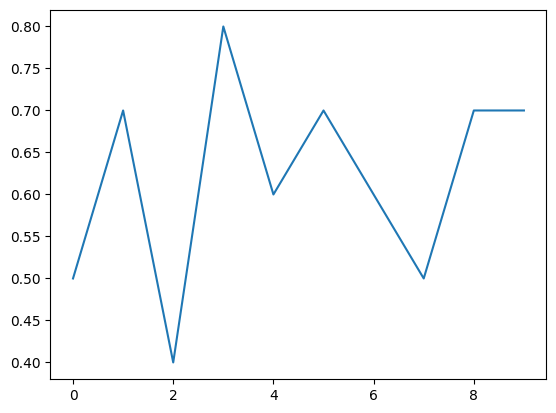

In [ ]:
plt.plot(activity)

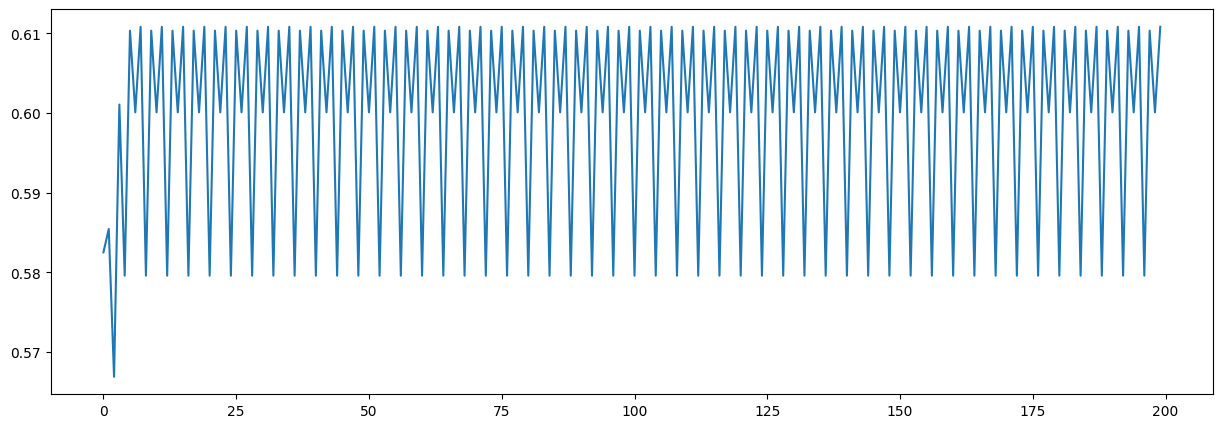

In [ ]:
C = []  # Connectivity matrix
N = 2048
k = 8
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni+(ki+1), ni-(ki+1)]

C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

omega = 1

# Rewiring
if omega > 0:
    for i in range(N):
        for j, nj in enumerate(C[i]):
            available_nodes = all_nodes - set(list(C[i])+[i])
            if np.random.random() < omega:  # rewire
                C[i, j] = np.random.choice(list(available_nodes))

# Weight matrix
# W = [np.zeros(len(C[ni])) for ni in range(N)]
W = [np.random.randint(2, size=len(C[ni]))*2-1 for ni in range(N)]

# initial state
states = np.random.randint(2, size=N)

activity = []

time = 1000
#update network
for ti in range(time):
    # update all neurons
    states = np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*1
    activity += [states.mean()]
plt.figure(figsize=(15,5))
plt.plot(activity[:200])

### Check

- Collective dynamics of ‘small-world’ networks
https://www.nature.com/articles/30918.

- Periodic neural activity induced by network complexity
https://journals.aps.org/pre/pdf/10.1103/PhysRevE.74.017102?casa_token=75qFbA66GvUAAAAA%3AlzqoPCbxQYIXBVN4o6neoGp34XFqc6ihyDbfT7mBfZQTbbGbs2hyVhA9NXbYA2pxkqDGuj-Y_Hsemw

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>